# Lab 5 - Digital Marketing Campaign: PCA Analysis
Joshy Kasahara & Isaac Braun\
Dataset from [Kaggle](https://www.kaggle.com/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset/data)

### Engineer Data

In [ ]:
# install.packages("factoextra")
library("factoextra")
library(dplyr)

# # Import a CSV file
marketing_data <- read.csv("./digital_marketing_campaign_dataset.csv")

# Drop columns 'column1' and 'column2'
marketing_data <- marketing_data %>% select(-CustomerID, -AdvertisingPlatform, -AdvertisingTool, -LoyaltyPoints, -Conversion)

# Convert label to nominal
marketing_data$Gender <- as.numeric(factor(marketing_data$Gender))
marketing_data$CampaignType <- as.numeric(factor(marketing_data$CampaignType))
marketing_data$CampaignChannel <- as.numeric(factor(marketing_data$CampaignChannel))

# print(marketing_data)

### Compute PCA in R

In [42]:
res.pca <- prcomp(marketing_data, scale = TRUE)

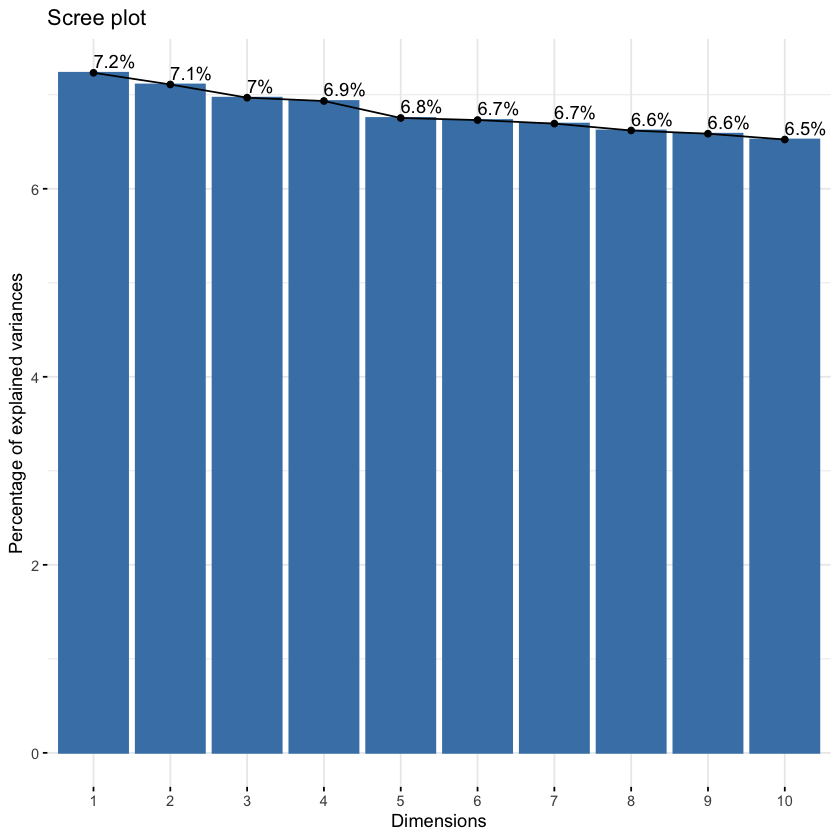

In [43]:
fviz_eig(res.pca, addlabels = TRUE) 
#It shows the percentage of variances explained by each principal component

### Correlation circle

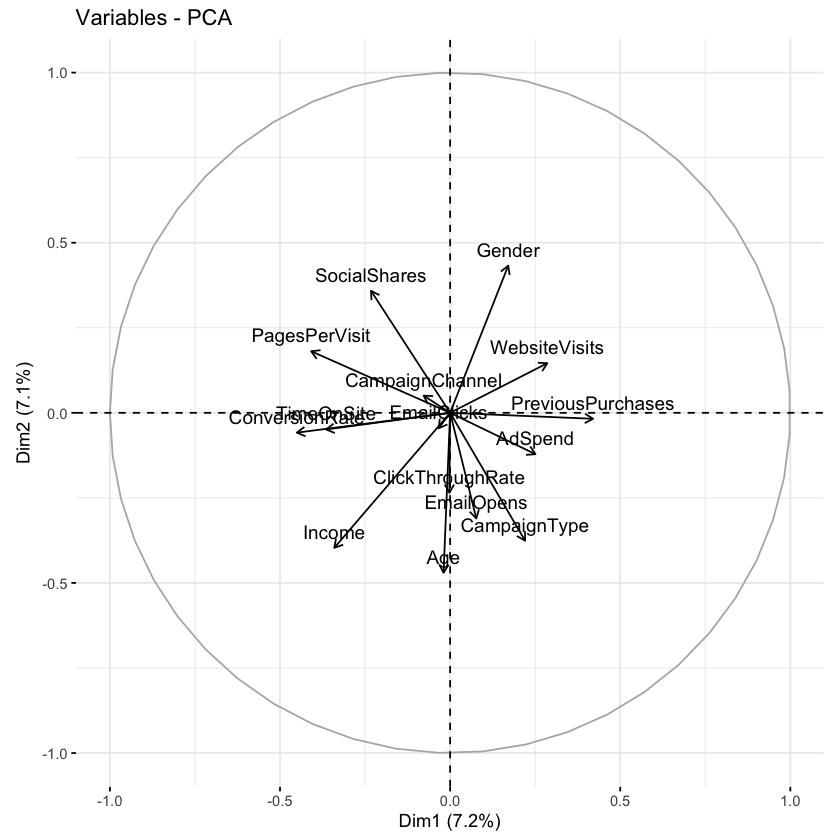

In [44]:
fviz_pca_var(res.pca, col.var = "black")

### Quality of representation

In [45]:
library("corrplot")

corrplot 0.94 loaded



                         Dim.1        Dim.2        Dim.3        Dim.4
Age               0.0003709724 0.2208725725 2.244027e-01 0.0052217925
Gender            0.0291679894 0.1870274947 1.535941e-01 0.0225203543
Income            0.1159717059 0.1574988464 5.755245e-02 0.0303066992
CampaignChannel   0.0060345526 0.0025467597 1.305949e-01 0.0909406399
CampaignType      0.0485412313 0.1412561256 1.075926e-01 0.0452746392
AdSpend           0.0629214085 0.0147901755 1.267663e-01 0.0677695328
ClickThroughRate  0.0000052431 0.0550900968 3.706195e-05 0.2997116164
ConversionRate    0.2029389331 0.0033988653 1.140148e-01 0.0176567858
WebsiteVisits     0.0816487258 0.0212624014 8.299688e-06 0.2757391250
PagesPerVisit     0.1668874329 0.0327747045 8.376754e-03 0.0001391715
TimeOnSite        0.1328802972 0.0023931216 6.649079e-02 0.0036644017
SocialShares      0.0540783350 0.1286672932 3.140456e-02 0.0062264181
EmailOpens        0.0059250659 0.0964903703 2.284474e-03 0.1377646602
EmailClicks       0.

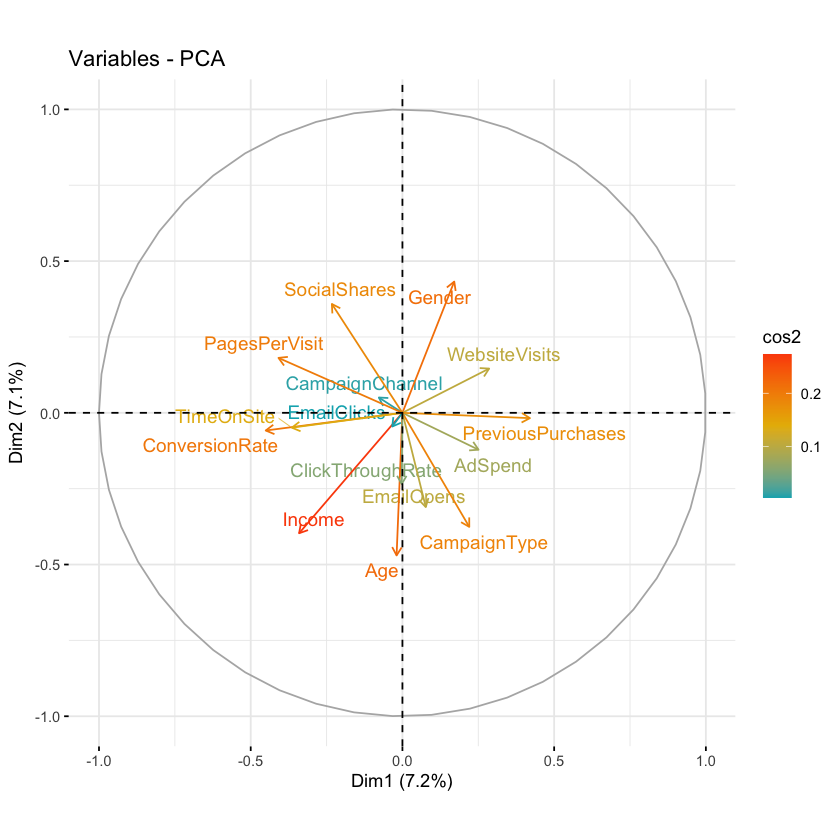

In [46]:
# Color by cos2 values: quality on the factor map. With different colors.
fviz_pca_var(res.pca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE # Avoid text overlapping
             )

#A high cos2 indicates a good representation of the variable on the principal component. 

var <- get_pca_var(res.pca)
print(var$cos2)

### Contributions of variables to PCs

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

                         Dim.1       Dim.2        Dim.3       Dim.4      Dim.5
Age                0.034188878 20.71154333 2.146680e+01  0.50207573  0.5118166
Gender             2.688127065 17.53784102 1.469311e+01  2.16533368  2.0291232
Income            10.687972952 14.76889659 5.505581e+00  2.91399129  3.5354123
CampaignChannel    0.556145434  0.23881338 1.249297e+01  8.74394903  1.2702685
CampaignType       4.473568471 13.24579296 1.029252e+01  4.35315979  8.7630831
AdSpend            5.798848153  1.38689633 1.212672e+01  6.51604542  8.3194983
ClickThroughRate   0.000483205  5.16587874 3.545419e-03 28.81729333  8.6213595
ConversionRate    18.702888015  0.31871656 1.090689e+01  1.69770121  0.6511423
WebsiteVisits      7.524761030  1.99380640 7.939645e-04 26.51233656  0.3492542
PagesPerVisit     15.380375372  3.07333185 8.013369e-01  0.01338135  6.6944032
TimeOnSite        12.246271723  0.22440650 6.360640e+00  0.35233248 10.0184137
SocialShares       4.983868931 12.06531978 3.004223e

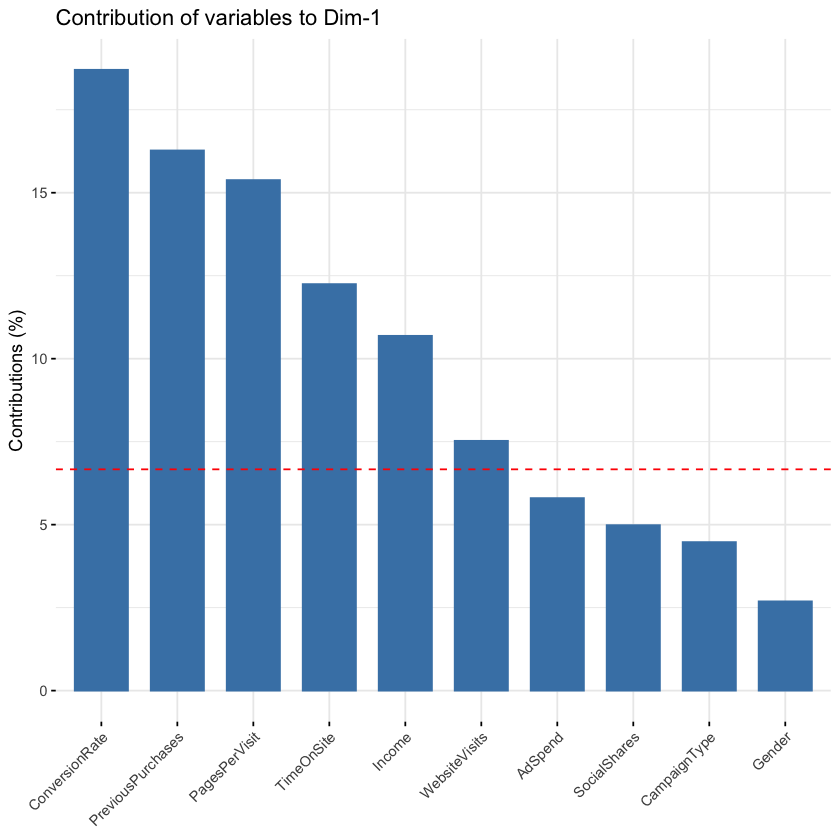

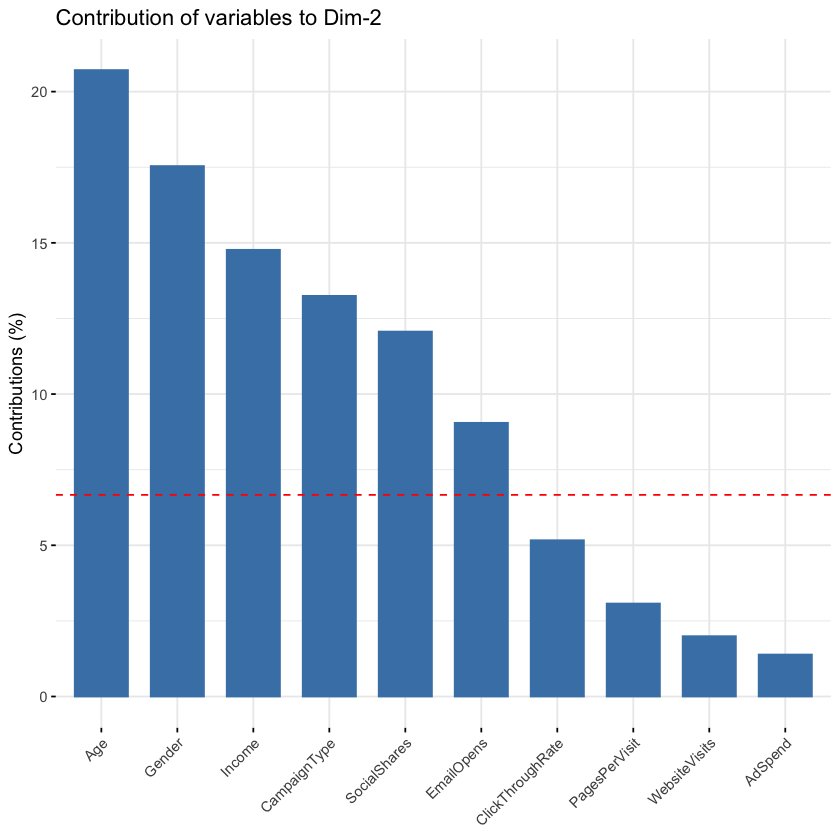

In [47]:
var <- get_pca_var(res.pca)
var

# Contribution of variables
print(var$contrib)

# Contributions of variables to PC1
fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)
# Contributions of variables to PC2
fviz_contrib(res.pca, choice = "var", axes = 2, top = 10)

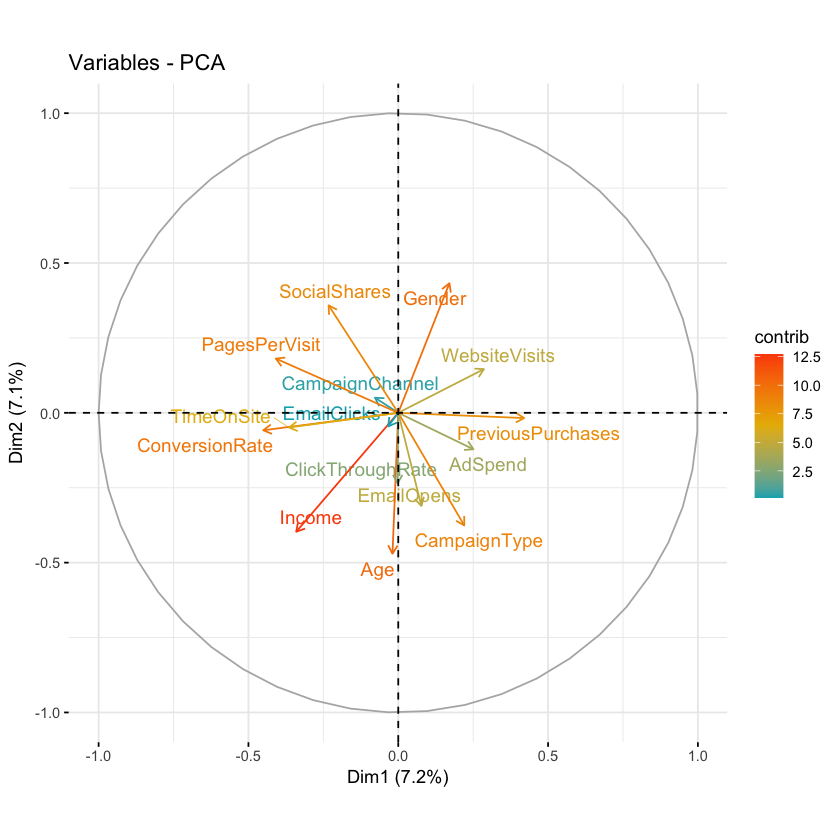

In [48]:
fviz_pca_var(res.pca,
             col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
)

### Analyzing each customer - Not Useful in this case

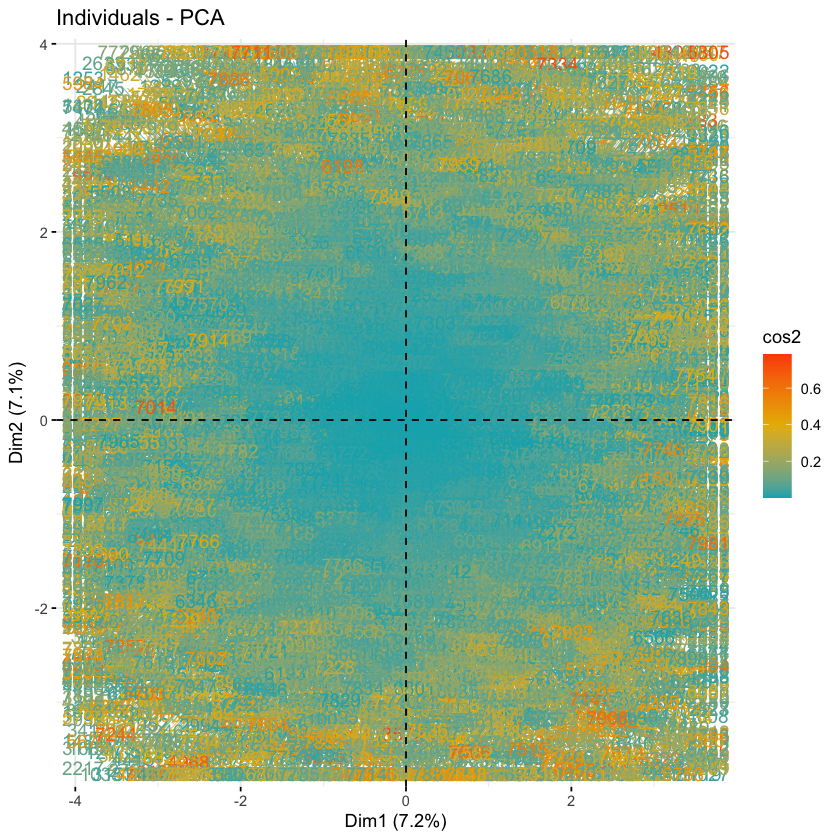

In [49]:
#Graph of individuals. Individuals with a similar profile are grouped together.
fviz_pca_ind(res.pca,
             col.ind = "cos2", # Color by the quality of representation cos2
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
)

### Showing the clusters

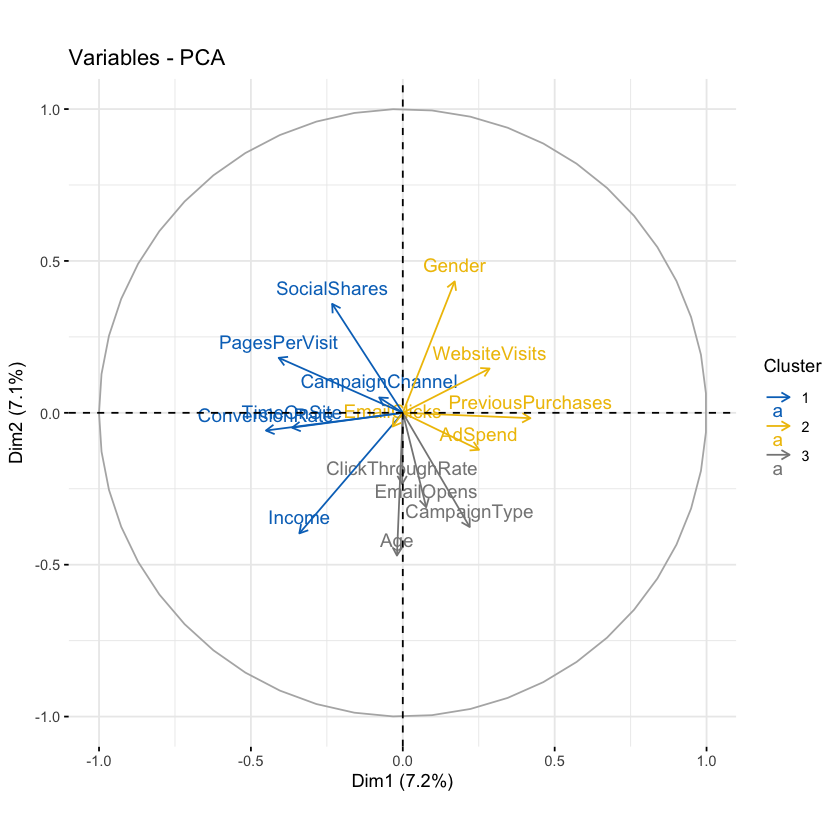

In [51]:
# Create a grouping variable using kmeans
# Create 3 groups of variables (centers = 3)
set.seed(123)
res.km <- kmeans(var$coord, centers = 3, nstart = 25)
grp <- as.factor(res.km$cluster)
# Color variables by groups
fviz_pca_var(res.pca, col.var = grp, 
             palette = c("#0073C2FF", "#EFC000FF", "#868686FF"),
             legend.title = "Cluster")